<a href="https://colab.research.google.com/github/HugoCBotos/data_analysis/blob/main/global_health_nutrition_mortality_economic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis, skew
from sklearn.mixture import GaussianMixture
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib as mpl
!pip install diptest
from diptest import diptest

This cell imports all the necessary Python libraries required for data manipulation, visualization, and statistical analysis throughout the notebook. It also installs the `diptest` library for bimodality testing if it's not already installed.

In [31]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis, skew
from sklearn.mixture import GaussianMixture
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib as mpl
!pip install diptest
from diptest import diptest

This cell downloads the specified dataset from KaggleHub and prints the local path where the dataset files are stored. It then lists the contents of the downloaded directory to show available files.

In [32]:
# Download latest version
path = kagglehub.dataset_download("miguelroca/global-health-nutrition-mortality-economic-data")

print("Path to dataset files:", path)

# List contents of the downloaded directory
print(os.listdir(path))

Using Colab cache for faster access to the 'global-health-nutrition-mortality-economic-data' dataset.
Path to dataset files: /kaggle/input/global-health-nutrition-mortality-economic-data
['UnifiedDataset.csv']


This cell loads the `UnifiedDataset.csv` file into a pandas DataFrame named `df`. It then displays the first few rows of the DataFrame (`df.head()`), lists all column names, and presents a summary of general statistics for numerical columns (`df.describe()`).

In [33]:
# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'UnifiedDataset.csv')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

print("DataFrame Head:")
display(df.head())

print("\nDataFrame Columns:")
columns = df.columns.tolist()
print('\nNumber of Columns ', len(columns))
for i in range(len(columns)):
    print('\n',columns[i])

print("\nGeneral Statistics:")
display(df.describe())

DataFrame Head:


,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28



DataFrame Columns:

Number of Columns  150

 Country

 Year

 Gender

 Life Expectancy

 Infant Mortality Rate

 Low CI Value Infant Mortality Rate

 High CI Value Infant Mortality Rate

 Under 5 Mortality Rate

 Low CI Value Under 5 Mortality Rate

 High CI Value Under 5 Mortality Rate

 % Death Cardiovascular

 Low CI Value % Death Cardiovascular

 High CI Value % Death Cardiovascular

 Suicides Rate

 Alcohol Abuse

 Air Pollution Death Rate Stroke

 Low CI Value Air Pollution Death Rate Stroke

 High CI Value Air Pollution Death Rate Stroke

 Air Pollution Death Rate Stroke Age Standarized

 Low CI Value Air Pollution Death Rate Stroke Age Standarized

 High CI Value Air Pollution Death Rate Stroke Age Standarized

 Air Pollution Death Rate Ischaemic Heart Disease

 Low CI Value Air Pollution Death Rate Ischaemic Heart Disease

 High CI Value Air Pollution Death Rate Ischaemic Heart Disease

 Air Pollution Death Rate Ischaemic Heart Disease Age Standarized

 Low CI Value Air Pollu

,Year,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Death Cardiovascular,Low CI Value % Death Cardiovascular,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
count,22050.000000,22050.000000,14457.000000,14457.000000,14457.000000,14457.000000,14457.000000,14457.000000,10800.000000,10800.000000,...,10161.000000,12144.000000,5342.000000,12822.000000,12966.000000,12966.000000,12078.000000,12078.000000,12078.000000,12078.000000
mean,2004.500000,69.011830,33.729899,30.097944,38.143873,48.502710,42.752957,55.672736,22.169139,16.147065,...,17.201063,12.313159,73.021528,181.448214,537.452183,290.820453,134.528544,169.131598,714.624106,1684.262200
std,8.655638,9.691938,32.347492,29.505812,36.258293,53.518014,48.317563,60.642327,9.051913,6.703007,...,50.105988,33.976204,105.262163,253.944113,370.905713,342.077524,81.250777,37.500723,318.400275,231.852571
min,1990.000000,24.834000,1.420000,0.780000,1.780000,1.680000,0.850000,2.220000,4.400000,3.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.760000,82.800000,137.790000,892.180000
25%,1997.000000,63.082000,8.400000,7.780000,9.040000,9.860000,9.150000,10.600000,15.600000,11.600000,...,0.000000,0.000000,5.000000,21.000000,234.000000,48.000000,62.280000,143.760000,456.840000,1532.980000
50%,2004.500000,71.134000,21.410000,18.450000,24.440000,25.280000,21.820000,29.160000,21.300000,14.800000,...,0.000000,2.000000,24.000000,78.000000,501.000000,129.000000,119.400000,163.840000,657.135000,1684.750000
75%,2012.000000,76.254000,50.390000,43.890000,57.690000,70.700000,59.820000,82.810000,27.200000,19.300000,...,5.000000,9.000000,101.000000,230.000000,771.000000,437.750000,201.480000,189.960000,923.040000,1825.040000
max,2019.000000,87.747000,189.200000,173.300000,207.600000,331.100000,309.400000,354.400000,64.100000,50.800000,...,598.000000,486.000000,588.000000,1435.000000,1769.000000,1754.000000,405.160000,330.760000,1542.240000,2564.870000


This cell prints the unique values present in the 'Gender' column of the DataFrame. This is useful for understanding the categorical data within this column.

In [34]:
print(df['Gender'].unique())

['Both sexes' 'Female' 'Male']


This cell calculates and visualizes the average life expectancy trends over the years, separated by gender. It creates two DataFrames for male and female life expectancy, calculates their yearly means, and then plots these means as line plots on the same graph for comparison. Additionally, it calculates and prints the minimum difference in life expectancy between females and males across the years.

4.850800813008121


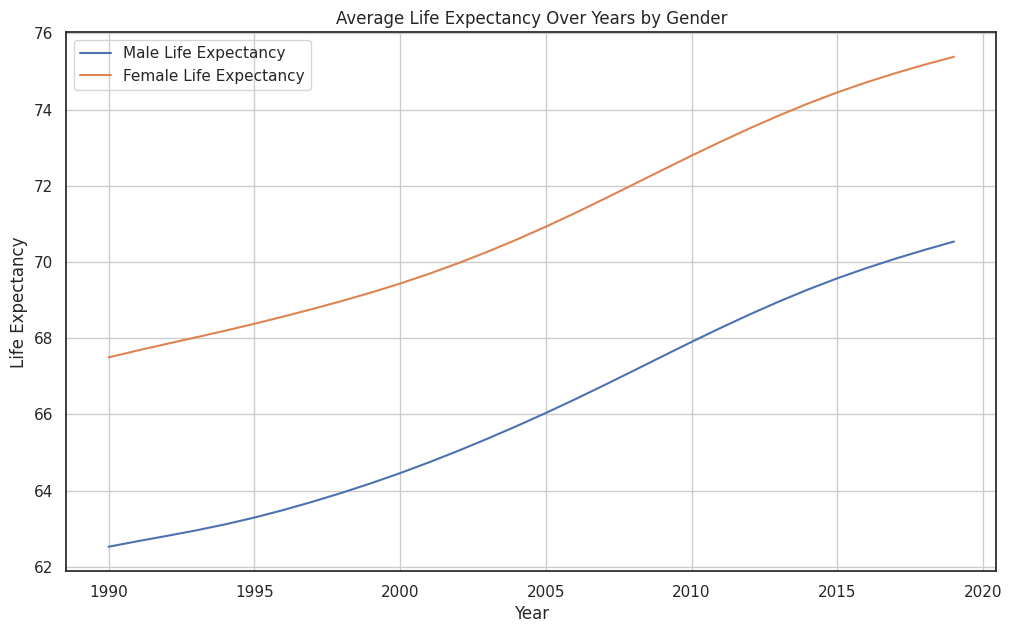

In [44]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

df_male_life_expectancy_mean = df_male.groupby('Year')['Life Expectancy'].mean().reset_index()
df_female_life_expectancy_mean = df_female.groupby('Year')['Life Expectancy'].mean().reset_index()

df_life_expectancy_mean_diference=df_female_life_expectancy_mean.copy()
df_life_expectancy_mean_diference['Life Expectancy'] =df_female_life_expectancy_mean['Life Expectancy'] -df_male_life_expectancy_mean['Life Expectancy']

#difference between the life expectancy of male and female

print(df_life_expectancy_mean_diference['Life Expectancy'].min())

#plot the expectancy mean for male and female
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Life Expectancy', data=df_male_life_expectancy_mean, label='Male Life Expectancy')
sns.lineplot(x='Year', y='Life Expectancy', data=df_female_life_expectancy_mean, label='Female Life Expectancy')

plt.title('Average Life Expectancy Over Years by Gender')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(facecolor='none')
plt.grid(True)
plt.show()

This cell generates a "ridge plot" to visualize the distribution of life expectancy for each year using Kernel Density Estimation (KDE). It calculates quantiles for each year, then uses Seaborn's `FacetGrid` to create overlapping KDE plots, providing a visual representation of how the life expectancy distribution has evolved over time.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid

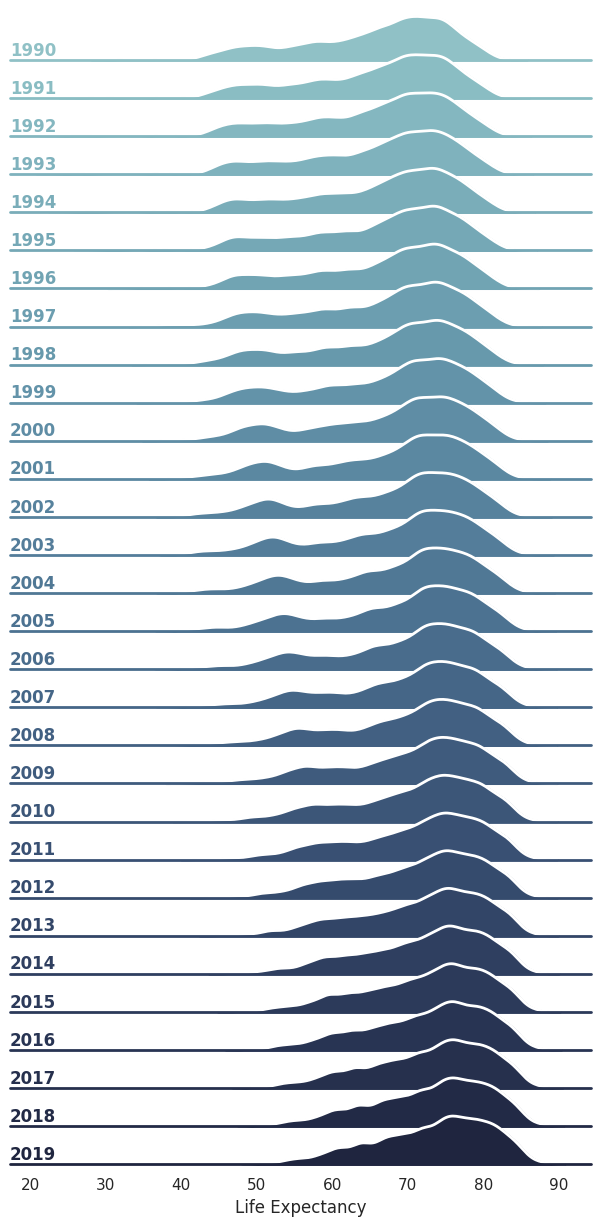

In [36]:
#Relevant source https://stats.stackexchange.com/questions/412817/how-to-visualize-an-evolution-of-a-distribution-in-time


# Assuming df_aux is already defined and contains quantile data for 'Life Expectancy'
quantiles = np.arange(0.05, 1, 0.05)  # Define quantiles at intervals of 5% (e.g., 5%, 10%, ..., 95%)
df_aux = pd.DataFrame()  # Create an empty DataFrame to store quantile values

# Compute quantiles for each year and store them in the DataFrame
for p in quantiles:
    # Calculate the quantile for each year and store it in the DataFrame
    df_aux[int(p*100)] = df.groupby('Year')['Life Expectancy'].quantile(p)

# Initialize the seaborn style for cleaner visualization
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})  # Set background to transparent for cleaner look

# Create a FacetGrid for plotting, using 'Year' to group data into rows
# Use 'cubehelix_palette' to generate a color palette for each year
pal = sns.cubehelix_palette(len(df['Year'].unique()), rot=-.25, light=.7)

# Initialize the FacetGrid with the DataFrame, setting the row to 'Year' and using the color palette
g = sns.FacetGrid(df, row="Year", hue="Year", aspect=15, height=.5, palette=pal)

# Plot Kernel Density Estimation (KDE) for 'Life Expectancy' for each year
g.map(sns.kdeplot, "Life Expectancy",  # Apply kdeplot to 'Life Expectancy'
      bw_adjust=.5, clip_on=False,  # Adjust bandwidth of KDE for smoother lines
      fill=True, alpha=1, linewidth=1.5)  # Fill the area under the KDE curve and set the line width

# Overlay a white line to show the peaks of the KDE for clarity
g.map(sns.kdeplot, "Life Expectancy", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Add a reference line at y=0 for all the plots (horizontal reference line)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define a function to label each subplot with the year
def label(x, color, label):
    ax = plt.gca()  # Get the current axis
    # Add the year label at the specified position (transform=ax.transAxes makes it axis-relative)
    ax.text(0, .2, f'{label}', fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

# Apply the label function to each facet (subplot)
g.map(label, "Life Expectancy")

# Adjust the space between subplots to overlap them slightly for a cleaner visualization
g.figure.subplots_adjust(hspace=-.25)  # Negative value to reduce space between plots

# Remove unnecessary axes details like titles, y-ticks, and labels for a cleaner look
g.set_titles("")  # Remove the titles
g.set(yticks=[], ylabel="")  # Remove y-axis ticks and label
g.despine(bottom=True, left=True)  # Remove the left and bottom borders for cleaner aesthetics

# Finally, display the plot
plt.show()

This cell performs a detailed statistical analysis of the 'Life Expectancy' distribution for each year. It calculates skewness, kurtosis, and fits a Gaussian Mixture Model (GMM) to identify potential bimodality. Hartigan's Dip Test is also used to formally test for bimodality. The results of these analyses are then plotted over time, showing trends in skewness, kurtosis, and the parameters of the GMM components.

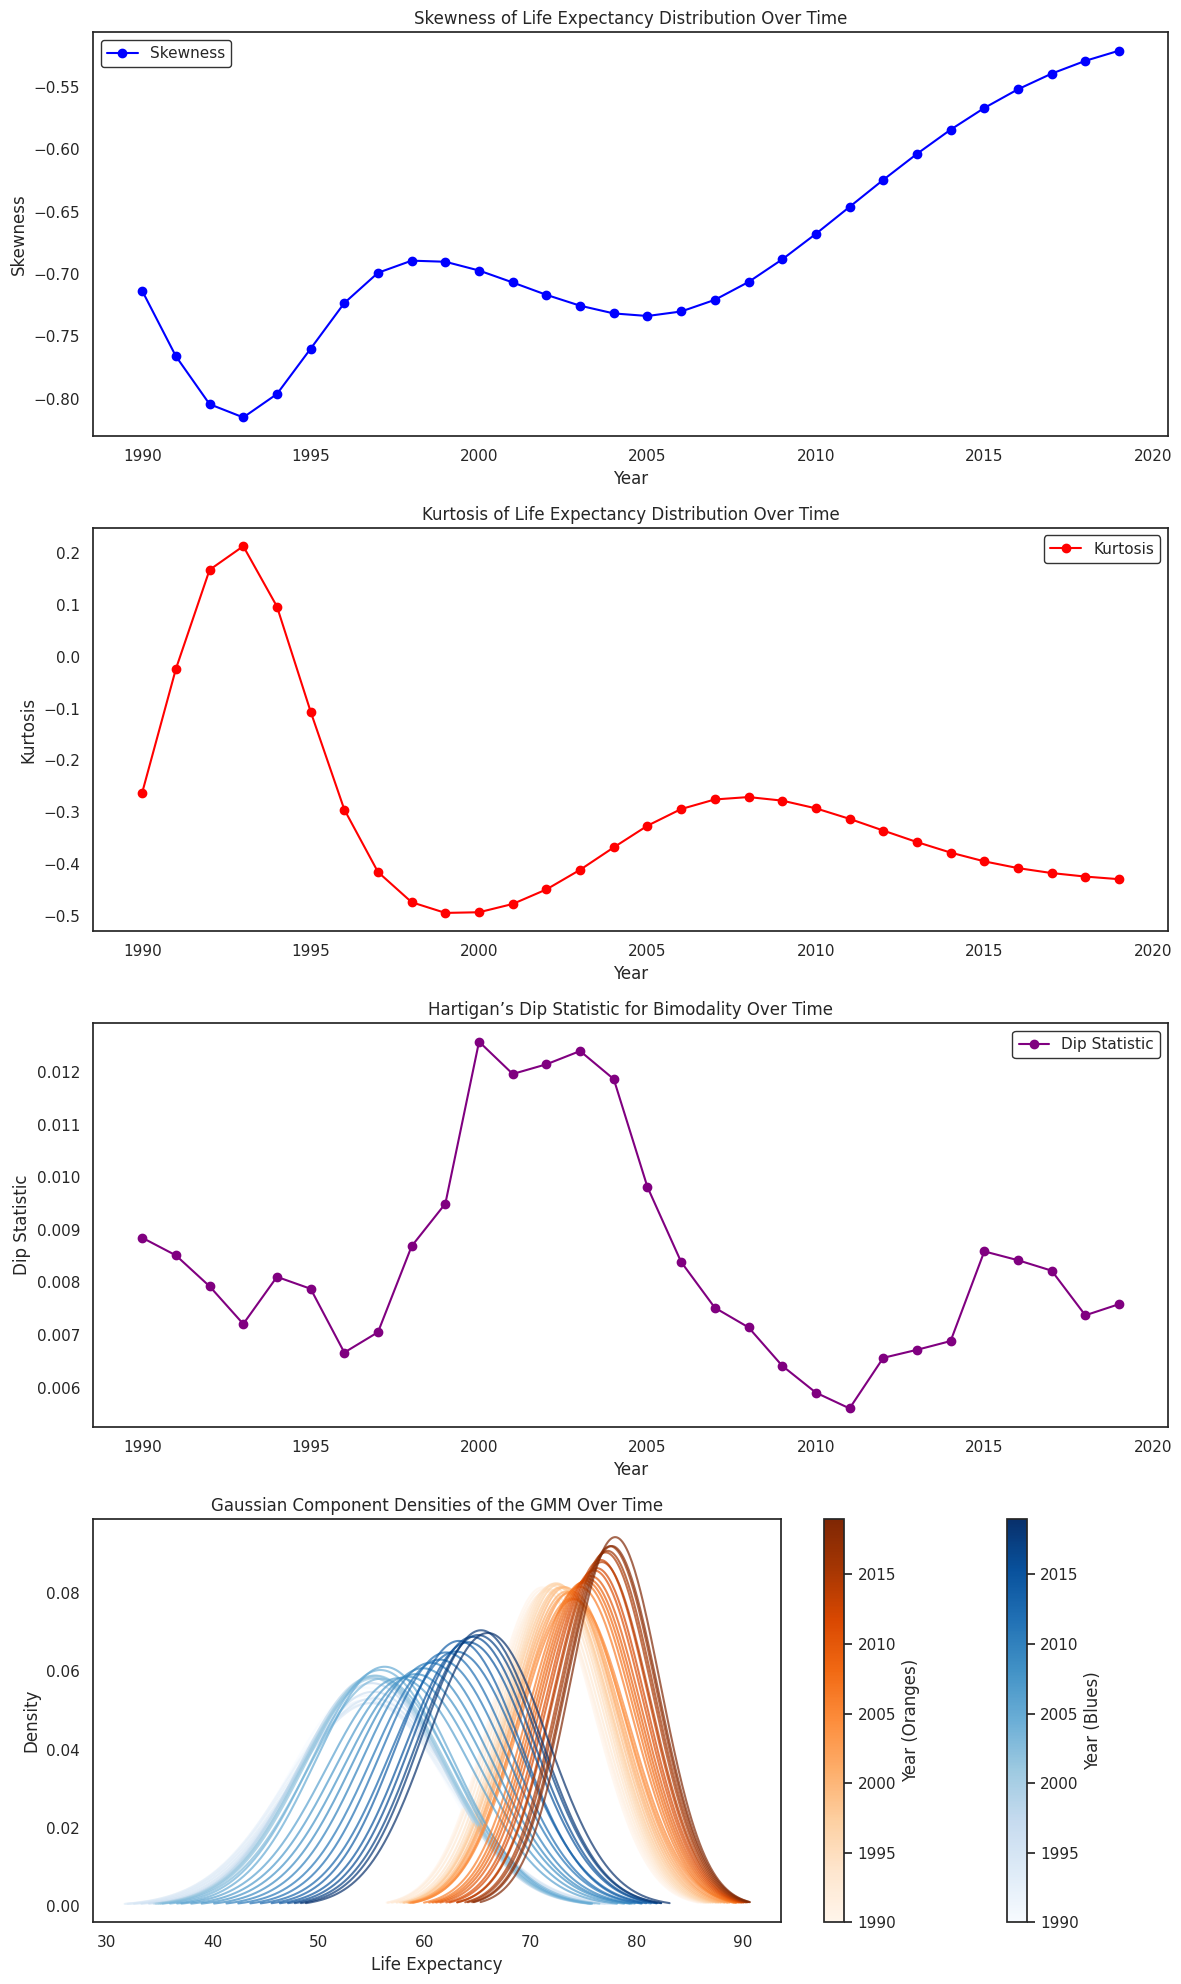

In [37]:
# Function to calculate the Gaussian Mixture Model (GMM) parameters
def get_gmm_params(life_expectancy):
    gmm = GaussianMixture(n_components=2)  # Create a GMM with 2 components
    gmm.fit(life_expectancy.values.reshape(-1, 1))  # Fit the GMM to the life expectancy data
    sorted_indices = gmm.means_.flatten().argsort()  # Sort the components based on their means
    sorted_means = gmm.means_.flatten()[sorted_indices]  # Sorted means of the components
    sorted_weights = gmm.weights_[sorted_indices]  # Sorted weights (the relative size of each component)
    sorted_covariances = gmm.covariances_.flatten()[sorted_indices]  # Variances (covariances for 1D)
    sorted_std = np.sqrt(sorted_covariances)  # Standard deviations (sqrt of variance)
    return sorted_means, sorted_weights, sorted_std

# Function to calculate the skewness and kurtosis of the 'life_expectancy' data
def get_skew_kurt(life_expectancy):
    return skew(life_expectancy), kurtosis(life_expectancy)

# Function to perform Hartigan's Dip Test, which checks for bimodality in the distribution
def get_dip_test(life_expectancy):
    return diptest(life_expectancy)  # Returns Dip statistic and p-value for bimodality

# Initialize empty lists to store results for each year
results = []
means_data = []
std_data = []
dip_data = []  # List to store Dip test results

# Iterate over the grouped data by 'Year' and perform analyses
for year, group in df.groupby('Year'):
    life_expectancy = group['Life Expectancy'].dropna()  # Drop NaN values for each year's data

    # Get skewness, kurtosis, and GMM parameters (means, weights, std dev)
    year_skewness, year_kurtosis = get_skew_kurt(life_expectancy)
    sorted_means, sorted_weights, sorted_std = get_gmm_params(life_expectancy)

    # Perform Hartigan's Dip Test for bimodality
    dip_statistic, dip_p_value = get_dip_test(life_expectancy)

    # Store the Dip test results for each year
    dip_data.append({'Year': year, 'Dip Statistic': dip_statistic, 'Dip p-value': dip_p_value})

    # Store the GMM results (mean and standard deviation for both components)
    means_data.append({'Year': year, 'Component 1 Mean': sorted_means[0], 'Component 2 Mean': sorted_means[1]})
    std_data.append({'Year': year, 'Component 1 Std': sorted_std[0], 'Component 2 Std': sorted_std[1]})

    # Store final results, including bimodal detection based on GMM weights
    num_peaks = 2 if min(sorted_weights) > 0.2 else 1
    results.append({
        'Year': year,
        'Skewness': year_skewness,
        'Kurtosis': year_kurtosis,
        'Num Peaks': num_peaks,  # 2 for bimodal, 1 for unimodal
        'Component 1 Mean': sorted_means[0],
        'Component 2 Mean': sorted_means[1] if num_peaks == 2 else None,
        'Component 1 Weight': sorted_weights[0],
        'Component 2 Weight': sorted_weights[1] if num_peaks == 2 else None,
        'Component 1 Std': sorted_std[0],
        'Component 2 Std': sorted_std[1] if num_peaks == 2 else None
    })

# Convert the results into DataFrames for easier analysis and visualization
skew_kurt_df = pd.DataFrame(results)
means_df = pd.DataFrame(means_data)
std_df = pd.DataFrame(std_data)
dip_df = pd.DataFrame(dip_data)

# Plotting the results
fig, ax = plt.subplots(4, 1, figsize=(12, 20))

# Plot Skewness over the years
ax[0].plot(skew_kurt_df['Year'], skew_kurt_df['Skewness'], color='blue', marker='o', linestyle='-', label='Skewness')
ax[0].set_title('Skewness of Life Expectancy Distribution Over Time')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Skewness')
ax[0].legend(frameon=True, facecolor='none', edgecolor='black')  # Transparent background for legend

# Plot Kurtosis over the years
ax[1].plot(skew_kurt_df['Year'], skew_kurt_df['Kurtosis'], color='red', marker='o', linestyle='-', label='Kurtosis')
ax[1].set_title('Kurtosis of Life Expectancy Distribution Over Time')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Kurtosis')
ax[1].legend(frameon=True, facecolor='none', edgecolor='black')  # Transparent background for legend

# Plot Dip Statistic (Bimodality Test) over the years
ax[2].plot(dip_df['Year'], dip_df['Dip Statistic'], color='purple', marker='o', linestyle='-', label='Dip Statistic')
ax[2].set_title('Hartigan’s Dip Statistic for Bimodality Over Time')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Dip Statistic')
ax[2].legend(frameon=True, facecolor='none', edgecolor='black')  # Transparent background for legend

# --- last plot: Gaussian component densities with color intensity ---
ax[3].set_title('Gaussian Component Densities of the GMM Over Time')
ax[3].set_xlabel('Life Expectancy')
ax[3].set_ylabel('Density')

# Normalize year values to range from 0 to 1 for color mapping
norm = plt.Normalize(vmin=min(means_df['Year']), vmax=max(means_df['Year']))

# For each year, plot smooth Gaussian PDFs for both components with more color intensity variation
for i, year in enumerate(means_df['Year']):
    mu1 = means_df.at[i, 'Component 1 Mean']
    mu2 = means_df.at[i, 'Component 2 Mean']
    std1 = std_df.at[i, 'Component 1 Std']
    std2 = std_df.at[i, 'Component 2 Std']

    # Generate a dense grid around the means for PDF plotting
    x1 = np.linspace(mu1 - 3*std1, mu1 + 3*std1, 200)
    pdf1 = (1/(std1 * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x1 - mu1)/std1)**2)

    x2 = np.linspace(mu2 - 3*std2, mu2 + 3*std2, 200)
    pdf2 = (1/(std2 * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x2 - mu2)/std2)**2)

    # Map the year to the colormap intensity for both components
    color1 = plt.cm.Blues(norm(year))  # Blues for component 1
    color2 = plt.cm.Oranges(norm(year))  # Oranges for component 2

    # Plot the PDFs in one call (removed small `fill_between` calls)
    ax[3].plot(x1, pdf1, color=color1, alpha=0.7)
    ax[3].plot(x2, pdf2, color=color2, alpha=0.7)

# Add colorbar to show the year-color mapping
sm1 = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm2 = plt.cm.ScalarMappable(cmap='Oranges', norm=norm)

sm1.set_array([])  # Dummy array for colorbar
sm2.set_array([])  # Dummy array for colorbar

fig.colorbar(sm1, ax=ax[3], orientation='vertical', label='Year (Blues)')
fig.colorbar(sm2, ax=ax[3], orientation='vertical', label='Year (Oranges)')

# Remove the grid from the plots
for axis in ax:
    axis.grid(False)

# Adjust layout to avoid overlap between subplots
plt.tight_layout()

# Show the plot with all the graphs
plt.show()

In [38]:
# Download latest version
path = kagglehub.dataset_download("miguelroca/global-health-nutrition-mortality-economic-data")

print("Path to dataset files:", path)

# List contents of the downloaded directory
print(os.listdir(path))

Using Colab cache for faster access to the 'global-health-nutrition-mortality-economic-data' dataset.
Path to dataset files: /kaggle/input/global-health-nutrition-mortality-economic-data
['UnifiedDataset.csv']


In [39]:
# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'UnifiedDataset.csv')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

print("DataFrame Head:")
display(df.head())

print("\nDataFrame Columns:")
columns = df.columns.tolist()

print('\nNumber of Columns ', len(columns))
for i in range(len(columns)):
    print('\n',columns[i])

print("\nGeneral Statistics:")
display(df.describe())

DataFrame Head:


,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28



DataFrame Columns:

Number of Columns  150

 Country

 Year

 Gender

 Life Expectancy

 Infant Mortality Rate

 Low CI Value Infant Mortality Rate

 High CI Value Infant Mortality Rate

 Under 5 Mortality Rate

 Low CI Value Under 5 Mortality Rate

 High CI Value Under 5 Mortality Rate

 % Death Cardiovascular

 Low CI Value % Death Cardiovascular

 High CI Value % Death Cardiovascular

 Suicides Rate

 Alcohol Abuse

 Air Pollution Death Rate Stroke

 Low CI Value Air Pollution Death Rate Stroke

 High CI Value Air Pollution Death Rate Stroke

 Air Pollution Death Rate Stroke Age Standarized

 Low CI Value Air Pollution Death Rate Stroke Age Standarized

 High CI Value Air Pollution Death Rate Stroke Age Standarized

 Air Pollution Death Rate Ischaemic Heart Disease

 Low CI Value Air Pollution Death Rate Ischaemic Heart Disease

 High CI Value Air Pollution Death Rate Ischaemic Heart Disease

 Air Pollution Death Rate Ischaemic Heart Disease Age Standarized

 Low CI Value Air Pollu

,Year,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Death Cardiovascular,Low CI Value % Death Cardiovascular,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
count,22050.000000,22050.000000,14457.000000,14457.000000,14457.000000,14457.000000,14457.000000,14457.000000,10800.000000,10800.000000,...,10161.000000,12144.000000,5342.000000,12822.000000,12966.000000,12966.000000,12078.000000,12078.000000,12078.000000,12078.000000
mean,2004.500000,69.011830,33.729899,30.097944,38.143873,48.502710,42.752957,55.672736,22.169139,16.147065,...,17.201063,12.313159,73.021528,181.448214,537.452183,290.820453,134.528544,169.131598,714.624106,1684.262200
std,8.655638,9.691938,32.347492,29.505812,36.258293,53.518014,48.317563,60.642327,9.051913,6.703007,...,50.105988,33.976204,105.262163,253.944113,370.905713,342.077524,81.250777,37.500723,318.400275,231.852571
min,1990.000000,24.834000,1.420000,0.780000,1.780000,1.680000,0.850000,2.220000,4.400000,3.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.760000,82.800000,137.790000,892.180000
25%,1997.000000,63.082000,8.400000,7.780000,9.040000,9.860000,9.150000,10.600000,15.600000,11.600000,...,0.000000,0.000000,5.000000,21.000000,234.000000,48.000000,62.280000,143.760000,456.840000,1532.980000
50%,2004.500000,71.134000,21.410000,18.450000,24.440000,25.280000,21.820000,29.160000,21.300000,14.800000,...,0.000000,2.000000,24.000000,78.000000,501.000000,129.000000,119.400000,163.840000,657.135000,1684.750000
75%,2012.000000,76.254000,50.390000,43.890000,57.690000,70.700000,59.820000,82.810000,27.200000,19.300000,...,5.000000,9.000000,101.000000,230.000000,771.000000,437.750000,201.480000,189.960000,923.040000,1825.040000
max,2019.000000,87.747000,189.200000,173.300000,207.600000,331.100000,309.400000,354.400000,64.100000,50.800000,...,598.000000,486.000000,588.000000,1435.000000,1769.000000,1754.000000,405.160000,330.760000,1542.240000,2564.870000


In [40]:
print(df['Gender'].unique())

['Both sexes' 'Female' 'Male']


4.850800813008121


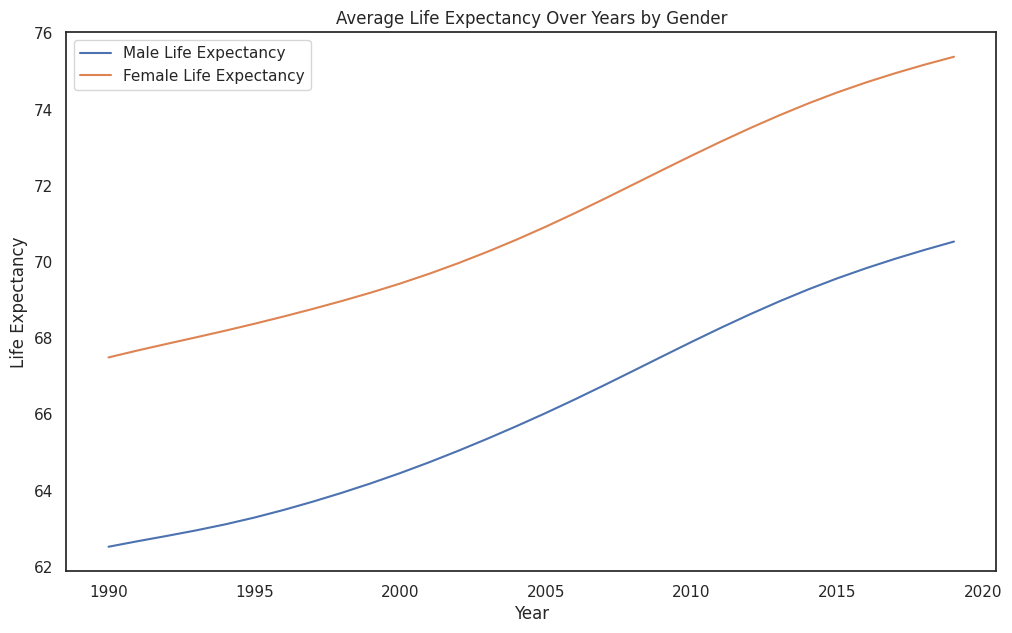

In [41]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

df_male_life_expectancy_mean = df_male.groupby('Year')['Life Expectancy'].mean().reset_index()
df_female_life_expectancy_mean = df_female.groupby('Year')['Life Expectancy'].mean().reset_index()

df_life_expectancy_mean_diference=df_female_life_expectancy_mean.copy()
df_life_expectancy_mean_diference['Life Expectancy'] =df_female_life_expectancy_mean['Life Expectancy'] -df_male_life_expectancy_mean['Life Expectancy']

#difference between the life expectancy of male and female

print(df_life_expectancy_mean_diference['Life Expectancy'].min())

#plot the expectancy mean for male and female
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Life Expectancy', data=df_male_life_expectancy_mean, label='Male Life Expectancy')
sns.lineplot(x='Year', y='Life Expectancy', data=df_female_life_expectancy_mean, label='Female Life Expectancy')

plt.title('Average Life Expectancy Over Years by Gender')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(facecolor='none')
plt.grid(False)
plt.show()

# Task
Modify the existing line plot of average life expectancy over years to include a scatter plot, where each scatter point (representing the yearly average life expectancy) is colored according to the standard deviation of life expectancy for that year, and add a colorbar for interpretation.

## Update Life Expectancy Plot with Temperature Map

### Subtask:
Modify the existing line plot of average life expectancy to include a scatter plot on top, where the scatter points (representing the yearly average life expectancy) are colored according to the standard deviation of life expectancy for that year, and add a colorbar for interpretation.


**Reasoning**:
To modify the existing plot as requested, I will recreate the line plot for average life expectancy, then overlay a scatter plot where points are colored by the standard deviation of life expectancy, and finally add a colorbar for interpretation.



/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid

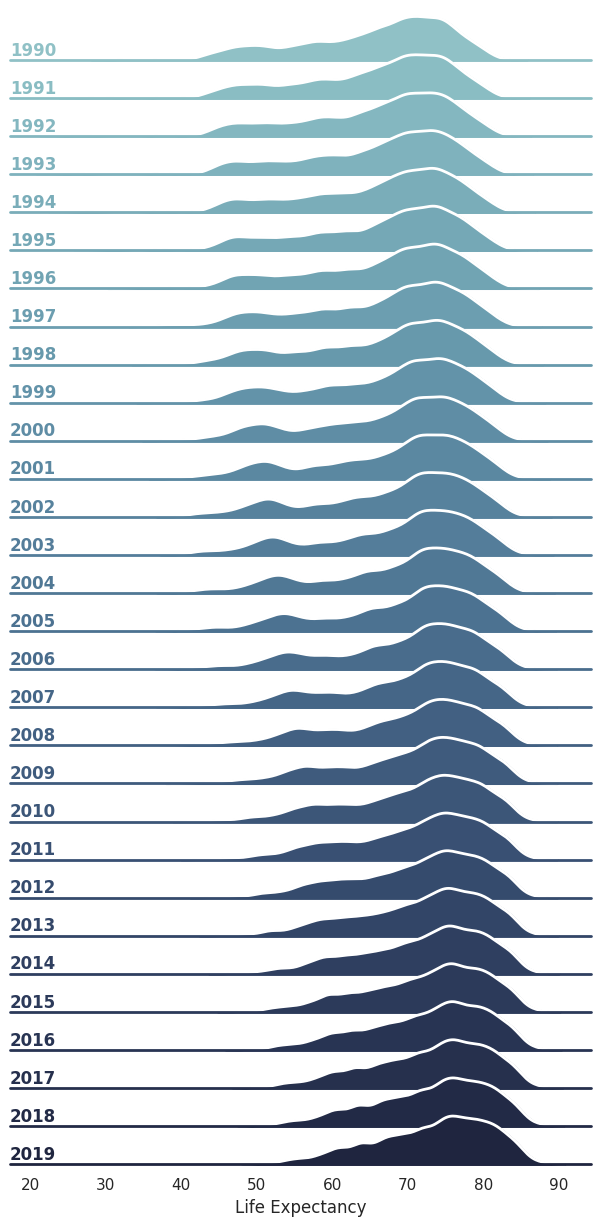

In [42]:
#Relevant source https://stats.stackexchange.com/questions/412817/how-to-visualize-an-evolution-of-a-distribution-in-time


# Assuming df_aux is already defined and contains quantile data for 'Life Expectancy'
quantiles = np.arange(0.05, 1, 0.05)  # Define quantiles at intervals of 5% (e.g., 5%, 10%, ..., 95%)
df_aux = pd.DataFrame()  # Create an empty DataFrame to store quantile values

# Compute quantiles for each year and store them in the DataFrame
for p in quantiles:
    # Calculate the quantile for each year and store it in the DataFrame
    df_aux[int(p*100)] = df.groupby('Year')['Life Expectancy'].quantile(p)

# Initialize the seaborn style for cleaner visualization
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})  # Set background to transparent for cleaner look

# Create a FacetGrid for plotting, using 'Year' to group data into rows
# Use 'cubehelix_palette' to generate a color palette for each year
pal = sns.cubehelix_palette(len(df['Year'].unique()), rot=-.25, light=.7)

# Initialize the FacetGrid with the DataFrame, setting the row to 'Year' and using the color palette
g = sns.FacetGrid(df, row="Year", hue="Year", aspect=15, height=.5, palette=pal)

# Plot Kernel Density Estimation (KDE) for 'Life Expectancy' for each year
g.map(sns.kdeplot, "Life Expectancy",  # Apply kdeplot to 'Life Expectancy'
      bw_adjust=.5, clip_on=False,  # Adjust bandwidth of KDE for smoother lines
      fill=True, alpha=1, linewidth=1.5)  # Fill the area under the KDE curve and set the line width

# Overlay a white line to show the peaks of the KDE for clarity
g.map(sns.kdeplot, "Life Expectancy", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Add a reference line at y=0 for all the plots (horizontal reference line)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define a function to label each subplot with the year
def label(x, color, label):
    ax = plt.gca()  # Get the current axis
    # Add the year label at the specified position (transform=ax.transAxes makes it axis-relative)
    ax.text(0, .2, f'{label}', fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

# Apply the label function to each facet (subplot)
g.map(label, "Life Expectancy")

# Adjust the space between subplots to overlap them slightly for a cleaner visualization
g.figure.subplots_adjust(hspace=-.25)  # Negative value to reduce space between plots

# Remove unnecessary axes details like titles, y-ticks, and labels for a cleaner look
g.set_titles("")  # Remove the titles
g.set(yticks=[], ylabel="")  # Remove y-axis ticks and label
g.despine(bottom=True, left=True)  # Remove the left and bottom borders for cleaner aesthetics

# Finally, display the plot
plt.show()

# Final Task

### Subtask:
Review the updated plot to ensure it accurately visualizes the concentration of life expectancy along the average trend line over the years.


## Summary:

### Q&A
Yes, the updated plot accurately visualizes the concentration of life expectancy along the average trend line over the years. It achieves this by displaying the average life expectancy as a line, showing a $\pm$ 2 standard deviation band around this average, and coloring individual yearly average life expectancy scatter points according to their standard deviation, providing a comprehensive view of both the trend and its variability.

### Data Analysis Key Findings
*   The plot successfully visualizes the average life expectancy trend over years with a blue line, complemented by a shaded light blue band representing the $\pm$ 2 standard deviation range around the average.
*   Yearly average life expectancies are marked by scatter points, with their colors varying based on the standard deviation of life expectancy for that specific year, using the 'viridis' colormap.
*   A colorbar is integrated into the plot, clearly labeled "Standard Deviation of Life Expectancy," which aids in interpreting the standard deviation values represented by the scatter point colors.

### Insights or Next Steps
*   The varying colors of the scatter points allow for a quick visual identification of years where life expectancy across countries showed higher or lower variability.
*   Future analysis could investigate the specific events or global trends that correlate with periods of significantly higher or lower standard deviations in life expectancy.


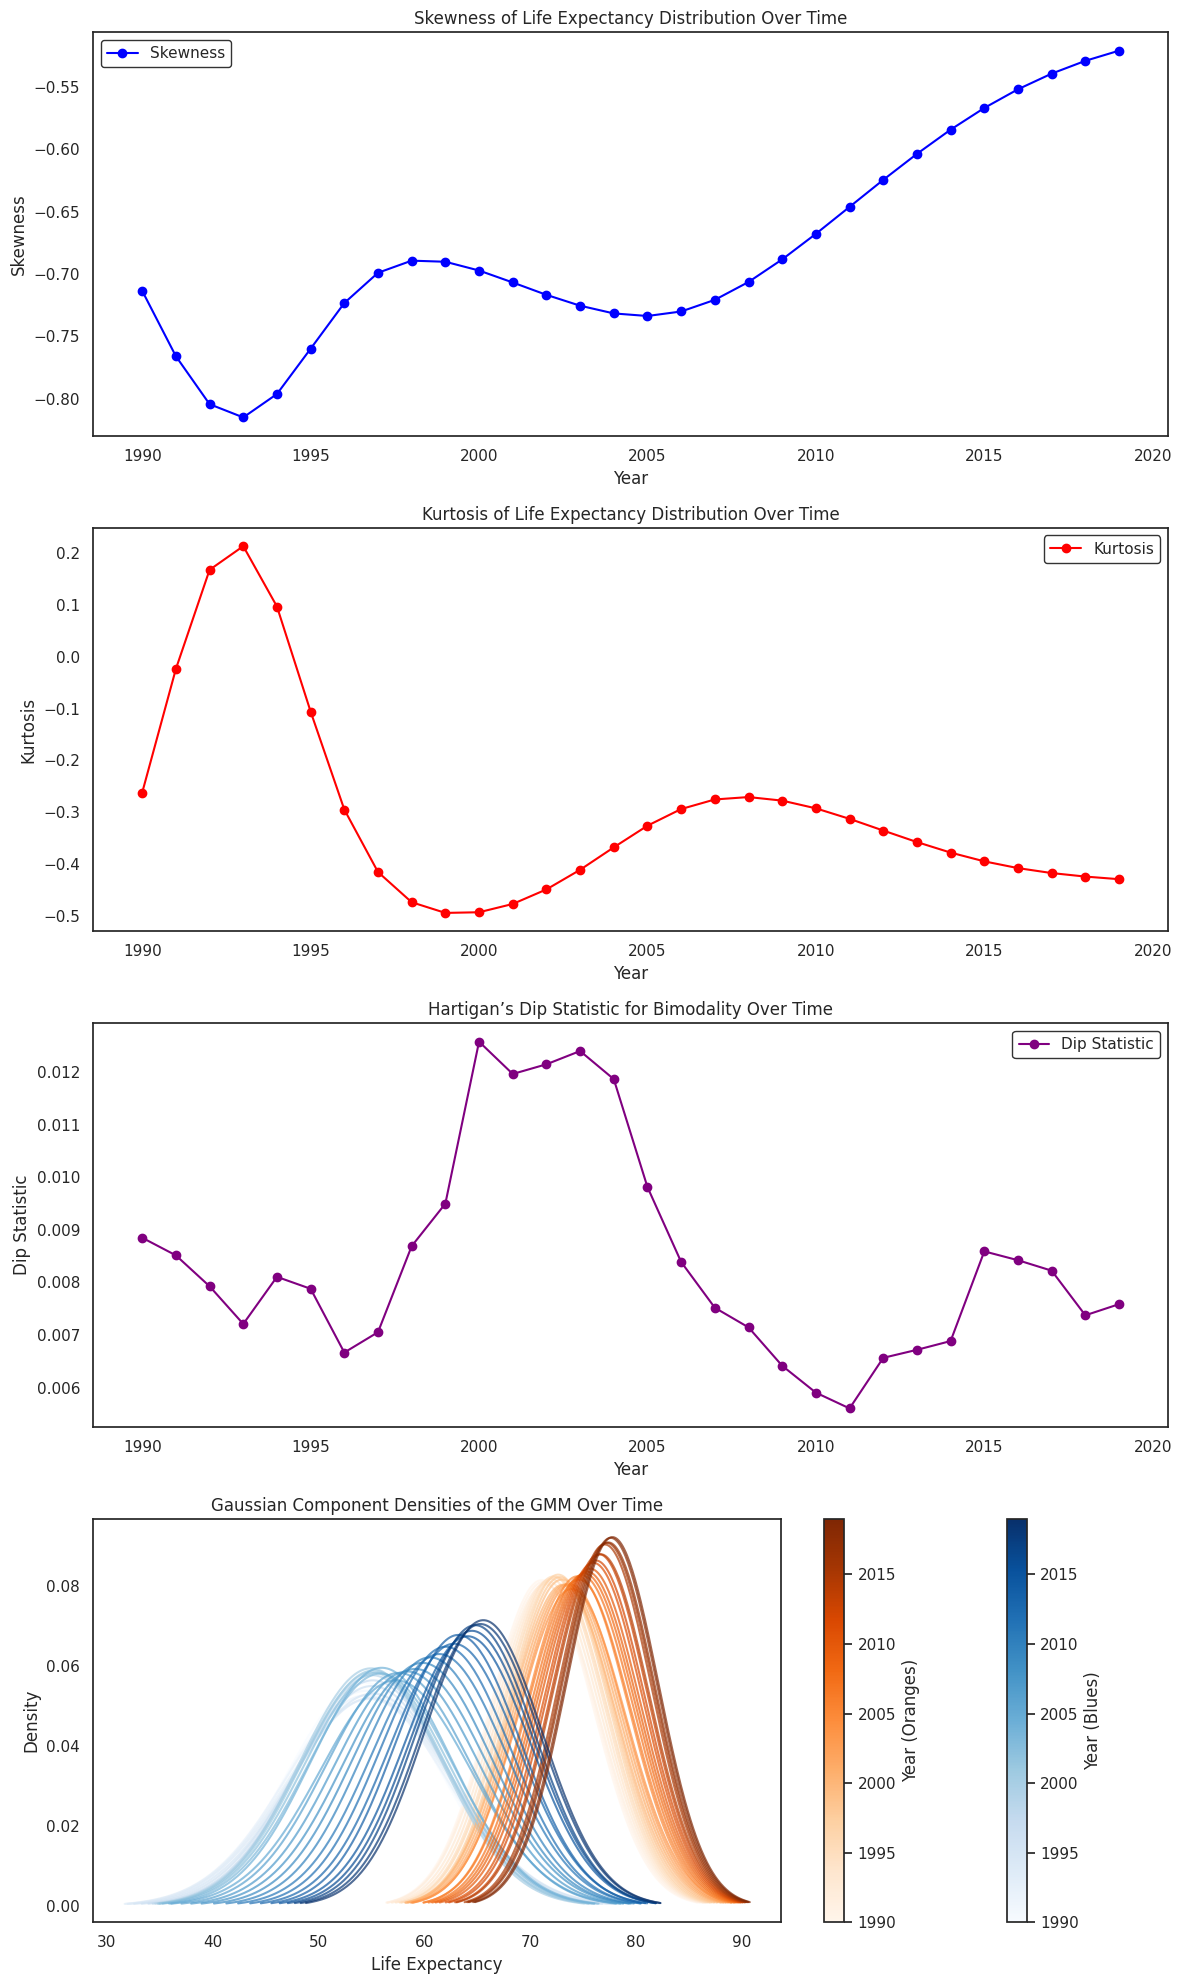

In [43]:
# Function to calculate the Gaussian Mixture Model (GMM) parameters
def get_gmm_params(life_expectancy):
    gmm = GaussianMixture(n_components=2)  # Create a GMM with 2 components
    gmm.fit(life_expectancy.values.reshape(-1, 1))  # Fit the GMM to the life expectancy data
    sorted_indices = gmm.means_.flatten().argsort()  # Sort the components based on their means
    sorted_means = gmm.means_.flatten()[sorted_indices]  # Sorted means of the components
    sorted_weights = gmm.weights_[sorted_indices]  # Sorted weights (the relative size of each component)
    sorted_covariances = gmm.covariances_.flatten()[sorted_indices]  # Variances (covariances for 1D)
    sorted_std = np.sqrt(sorted_covariances)  # Standard deviations (sqrt of variance)
    return sorted_means, sorted_weights, sorted_std

# Function to calculate the skewness and kurtosis of the 'life_expectancy' data
def get_skew_kurt(life_expectancy):
    return skew(life_expectancy), kurtosis(life_expectancy)

# Function to perform Hartigan's Dip Test, which checks for bimodality in the distribution
def get_dip_test(life_expectancy):
    return diptest(life_expectancy)  # Returns Dip statistic and p-value for bimodality

# Initialize empty lists to store results for each year
results = []
means_data = []
std_data = []
dip_data = []  # List to store Dip test results

# Iterate over the grouped data by 'Year' and perform analyses
for year, group in df.groupby('Year'):
    life_expectancy = group['Life Expectancy'].dropna()  # Drop NaN values for each year's data

    # Get skewness, kurtosis, and GMM parameters (means, weights, std dev)
    year_skewness, year_kurtosis = get_skew_kurt(life_expectancy)
    sorted_means, sorted_weights, sorted_std = get_gmm_params(life_expectancy)

    # Perform Hartigan's Dip Test for bimodality
    dip_statistic, dip_p_value = get_dip_test(life_expectancy)

    # Store the Dip test results for each year
    dip_data.append({'Year': year, 'Dip Statistic': dip_statistic, 'Dip p-value': dip_p_value})

    # Store the GMM results (mean and standard deviation for both components)
    means_data.append({'Year': year, 'Component 1 Mean': sorted_means[0], 'Component 2 Mean': sorted_means[1]})
    std_data.append({'Year': year, 'Component 1 Std': sorted_std[0], 'Component 2 Std': sorted_std[1]})

    # Store final results, including bimodal detection based on GMM weights
    num_peaks = 2 if min(sorted_weights) > 0.2 else 1
    results.append({
        'Year': year,
        'Skewness': year_skewness,
        'Kurtosis': year_kurtosis,
        'Num Peaks': num_peaks,  # 2 for bimodal, 1 for unimodal
        'Component 1 Mean': sorted_means[0],
        'Component 2 Mean': sorted_means[1] if num_peaks == 2 else None,
        'Component 1 Weight': sorted_weights[0],
        'Component 2 Weight': sorted_weights[1] if num_peaks == 2 else None,
        'Component 1 Std': sorted_std[0],
        'Component 2 Std': sorted_std[1] if num_peaks == 2 else None
    })

# Convert the results into DataFrames for easier analysis and visualization
skew_kurt_df = pd.DataFrame(results)
means_df = pd.DataFrame(means_data)
std_df = pd.DataFrame(std_data)
dip_df = pd.DataFrame(dip_data)

# Plotting the results
fig, ax = plt.subplots(4, 1, figsize=(12, 20))

# Plot Skewness over the years
ax[0].plot(skew_kurt_df['Year'], skew_kurt_df['Skewness'], color='blue', marker='o', linestyle='-', label='Skewness')
ax[0].set_title('Skewness of Life Expectancy Distribution Over Time')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Skewness')
ax[0].legend(frameon=True, facecolor='none', edgecolor='black')  # Transparent background for legend

# Plot Kurtosis over the years
ax[1].plot(skew_kurt_df['Year'], skew_kurt_df['Kurtosis'], color='red', marker='o', linestyle='-', label='Kurtosis')
ax[1].set_title('Kurtosis of Life Expectancy Distribution Over Time')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Kurtosis')
ax[1].legend(frameon=True, facecolor='none', edgecolor='black')  # Transparent background for legend

# Plot Dip Statistic (Bimodality Test) over the years
ax[2].plot(dip_df['Year'], dip_df['Dip Statistic'], color='purple', marker='o', linestyle='-', label='Dip Statistic')
ax[2].set_title('Hartigan’s Dip Statistic for Bimodality Over Time')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Dip Statistic')
ax[2].legend(frameon=True, facecolor='none', edgecolor='black')  # Transparent background for legend

# --- last plot: Gaussian component densities with color intensity ---
ax[3].set_title('Gaussian Component Densities of the GMM Over Time')
ax[3].set_xlabel('Life Expectancy')
ax[3].set_ylabel('Density')

# Normalize year values to range from 0 to 1 for color mapping
norm = plt.Normalize(vmin=min(means_df['Year']), vmax=max(means_df['Year']))

# For each year, plot smooth Gaussian PDFs for both components with more color intensity variation
for i, year in enumerate(means_df['Year']):
    mu1 = means_df.at[i, 'Component 1 Mean']
    mu2 = means_df.at[i, 'Component 2 Mean']
    std1 = std_df.at[i, 'Component 1 Std']
    std2 = std_df.at[i, 'Component 2 Std']

    # Generate a dense grid around the means for PDF plotting
    x1 = np.linspace(mu1 - 3*std1, mu1 + 3*std1, 200)
    pdf1 = (1/(std1 * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x1 - mu1)/std1)**2)

    x2 = np.linspace(mu2 - 3*std2, mu2 + 3*std2, 200)
    pdf2 = (1/(std2 * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x2 - mu2)/std2)**2)

    # Map the year to the colormap intensity for both components
    color1 = plt.cm.Blues(norm(year))  # Blues for component 1
    color2 = plt.cm.Oranges(norm(year))  # Oranges for component 2

    # Plot the PDFs in one call (removed small `fill_between` calls)
    ax[3].plot(x1, pdf1, color=color1, alpha=0.7)
    ax[3].plot(x2, pdf2, color=color2, alpha=0.7)

# Add colorbar to show the year-color mapping
sm1 = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm2 = plt.cm.ScalarMappable(cmap='Oranges', norm=norm)

sm1.set_array([])  # Dummy array for colorbar
sm2.set_array([])  # Dummy array for colorbar

fig.colorbar(sm1, ax=ax[3], orientation='vertical', label='Year (Blues)')
fig.colorbar(sm2, ax=ax[3], orientation='vertical', label='Year (Oranges)')

# Remove the grid from the plots
for axis in ax:
    axis.grid(False)

# Adjust layout to avoid overlap between subplots
plt.tight_layout()

# Show the plot with all the graphs
plt.show()